In [18]:
from src.preprocess import baixar_dados, salvar_csv, agregacao_mensal
import pandas as pd

# Baixar dados da api yahoo finance e salvar em csv (dados diários) dos últimos 10 anos
df = baixar_dados("AAPL", 10)
salvar_csv(df, "data/dados_diarios.csv")
# Agrupar os dados diários em mensais (fechamento do mês) e salvar em csv
df_mensal = agregacao_mensal(df)
salvar_csv(df_mensal, "data/dados_mensais.csv")
df_mensal = pd.read_csv("data/dados_mensais.csv", index_col="Date", parse_dates=True)

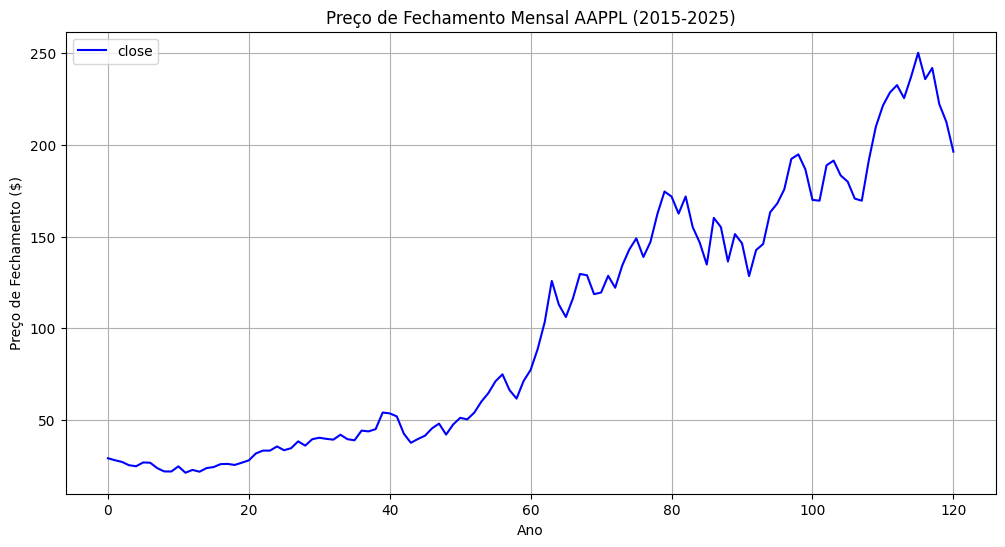

In [4]:
# Usando os dados mensais, plotar o preço de fechamento mensal
import matplotlib.pyplot as plt
import pandas as pd

df_mensal = pd.read_csv("/home/useradd/stocks-analysis/data/dados_mensais.csv")

df_mensal.plot(figsize=(12, 6), title="Preço de Fechamento Mensal AAPPL (2015-2025)", color="blue")
plt.xlabel("Ano")
plt.ylabel("Preço de Fechamento ($)")
plt.grid()
plt.savefig("plots/fechamento_mensal.png")



In [ ]:
from modelagem.descritive_data import quantis, media_mediana, desvio_padrao

desvio_padrao(df_mensal)
media_mediana(df_mensal)
# quantis(df_mensal)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_mensal['close'], model='multiplicative', period=12)

# Plotar os componentes
result.plot()
plt.tight_layout()
plt.show()

In [27]:
from statsmodels.tsa.stattools import adfuller

resultado_adf = adfuller(df_mensal['close'])

print("ADF Statistic:", resultado_adf[0])
print("p-value:", resultado_adf[1])

# Se p-value < 0.05, a série é estacionária

ADF Statistic: -0.43542177310089825
p-value: 0.9040145114455148


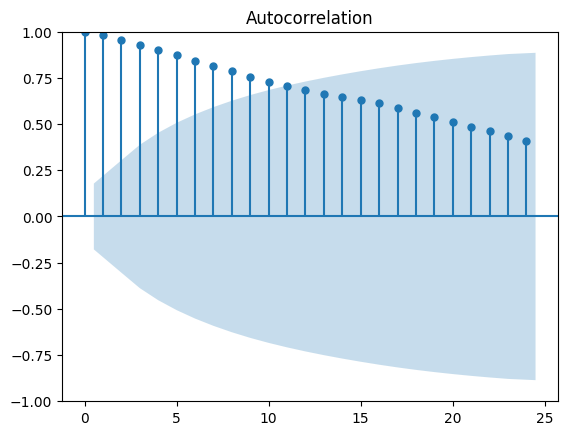

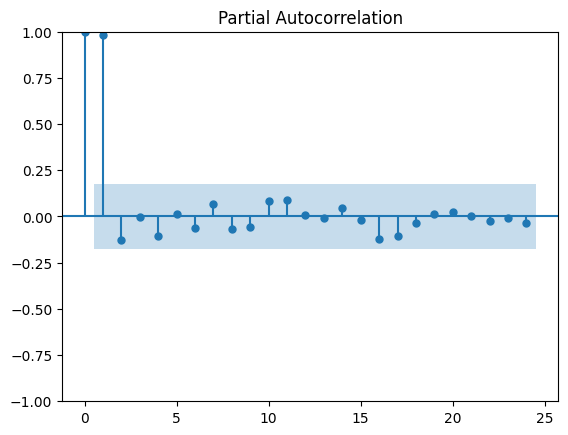

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_mensal['close'], lags=24)
plt.show()

plot_pacf(df_mensal['close'], lags=24)
plt.show()
